In [1]:
import pandas as pd
import yfinance as yf
import pandas_datareader.data as pdr
yf.pdr_override()
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pdr.get_data_yahoo("TATAMOTORS.NS",start = "2000-01-01",end="2023-08-24")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,39.744186,41.631748,39.744186,41.535931,32.829163,3528277
2000-01-04,41.583839,41.967102,39.475903,39.897491,31.534174,3544397
2000-01-05,37.176334,41.737144,37.176334,40.865227,32.299057,5849540
2000-01-06,41.200577,44.055874,41.200577,42.561157,33.639484,10274966
2000-01-07,42.925255,45.972179,42.752785,45.972179,36.335484,11477451


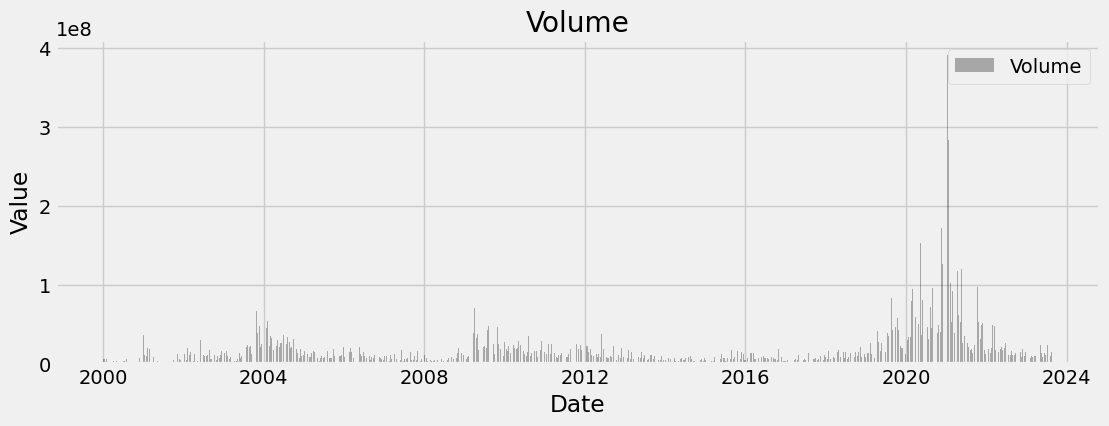

In [3]:
plt.figure(figsize=(12, 4))
plt.bar(df.index, df['Volume'], alpha=0.3, label='Volume', color='black')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# VWAP 13 days

In [4]:
df['Price'] = (df['High']+df['Low']+df['Close'])/3
df['VOlXPrice'] = df['Volume']*df['Price']
df['Num'] = df['VOlXPrice'].rolling(window=13).sum()
df['Den'] = df['Volume'].rolling(window=13).sum()
df['VWAP_13'] = df['Num']/df['Den']
df.drop(columns=['VOlXPrice','Num','Den'],inplace=True)

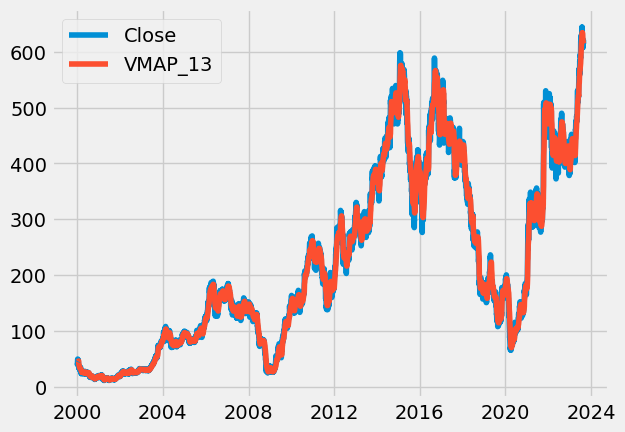

In [5]:
plt.plot(df['Close'],label="Close")
plt.plot(df['VWAP_13'],label='VMAP_13')
plt.legend()
plt.show()

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price,VWAP_13
Date,,,,,,,,
2000-01-03,39.744186,41.631748,39.744186,41.535931,32.829163,3528277,40.970622,NaN
2000-01-04,41.583839,41.967102,39.475903,39.897491,31.534174,3544397,40.446832,NaN
2000-01-05,37.176334,41.737144,37.176334,40.865227,32.299057,5849540,39.926235,NaN
2000-01-06,41.200577,44.055874,41.200577,42.561157,33.639484,10274966,42.605869,NaN
2000-01-07,42.925255,45.972179,42.752785,45.972179,36.335484,11477451,44.899048,NaN


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Price,VWAP_13
Date,,,,,,,,
2023-08-17,620.000000,622.000000,611.000000,613.750000,613.750000,12119293,615.583333,617.818057
2023-08-18,612.799988,620.099976,610.900024,615.799988,615.799988,11190760,615.599996,616.763069
2023-08-21,617.000000,623.299988,614.799988,620.500000,620.500000,9580365,619.533325,615.556194
2023-08-22,621.799988,626.500000,618.599976,620.200012,620.200012,8534395,621.766663,614.812852
2023-08-23,622.750000,622.750000,613.150024,613.900024,613.900024,8248333,616.600016,614.580680


# VWAP 20

In [8]:
df['VOlXPrice'] = df['Volume']*df['Price']
df['Num'] = df['VOlXPrice'].rolling(window=20).sum()
df['Den'] = df['Volume'].rolling(window=20).sum()
df['VWAP_20'] = df['Num']/df['Den']
df.drop(columns=['VOlXPrice','Num','Den'],inplace=True)

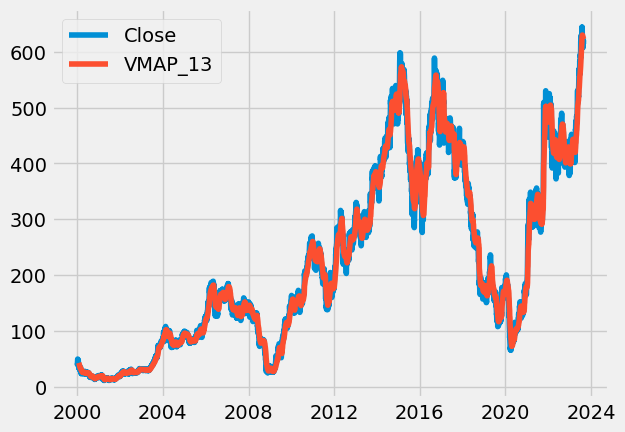

In [9]:
plt.plot(df['Close'],label="Close")
plt.plot(df['VWAP_20'],label='VMAP_13')
plt.legend()
plt.show()

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price,VWAP_13,VWAP_20
Date,,,,,,,,,
2000-01-03,39.744186,41.631748,39.744186,41.535931,32.829163,3528277,40.970622,NaN,NaN
2000-01-04,41.583839,41.967102,39.475903,39.897491,31.534174,3544397,40.446832,NaN,NaN
2000-01-05,37.176334,41.737144,37.176334,40.865227,32.299057,5849540,39.926235,NaN,NaN
2000-01-06,41.200577,44.055874,41.200577,42.561157,33.639484,10274966,42.605869,NaN,NaN
2000-01-07,42.925255,45.972179,42.752785,45.972179,36.335484,11477451,44.899048,NaN,NaN


# Alpha Using VWAP13 and VWAP20

In [11]:
df['VAR_VWAP'] = df['VWAP_13'] - df['VWAP_20']
df.drop(columns=['VWAP_13','VWAP_20'],inplace=True)

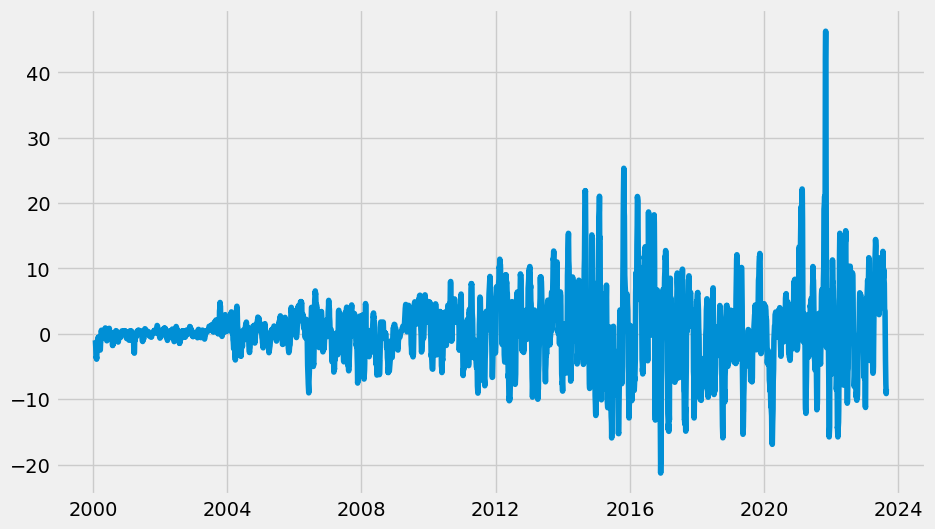

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['VAR_VWAP'])
plt.show()

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price,VAR_VWAP
Date,,,,,,,,
2000-01-03,39.744186,41.631748,39.744186,41.535931,32.829163,3528277,40.970622,NaN
2000-01-04,41.583839,41.967102,39.475903,39.897491,31.534174,3544397,40.446832,NaN
2000-01-05,37.176334,41.737144,37.176334,40.865227,32.299057,5849540,39.926235,NaN
2000-01-06,41.200577,44.055874,41.200577,42.561157,33.639484,10274966,42.605869,NaN
2000-01-07,42.925255,45.972179,42.752785,45.972179,36.335484,11477451,44.899048,NaN


# RSI 

In [14]:
delta = df['Adj Close'].diff(1)
delta.dropna(inplace=True)
positive = delta.copy()
negative = delta.copy()
positive[positive < 0] = 0
negative[negative > 0] = 0
days = 14
avg_gain = positive.rolling(window = days).mean()
avg_loss = abs(negative.rolling(window = days).mean())
relative_strength = avg_gain / avg_loss
RSI = 100.0 - (100.0 / (1 + relative_strength))
df['RSI'] = RSI
df.dropna(inplace=True)

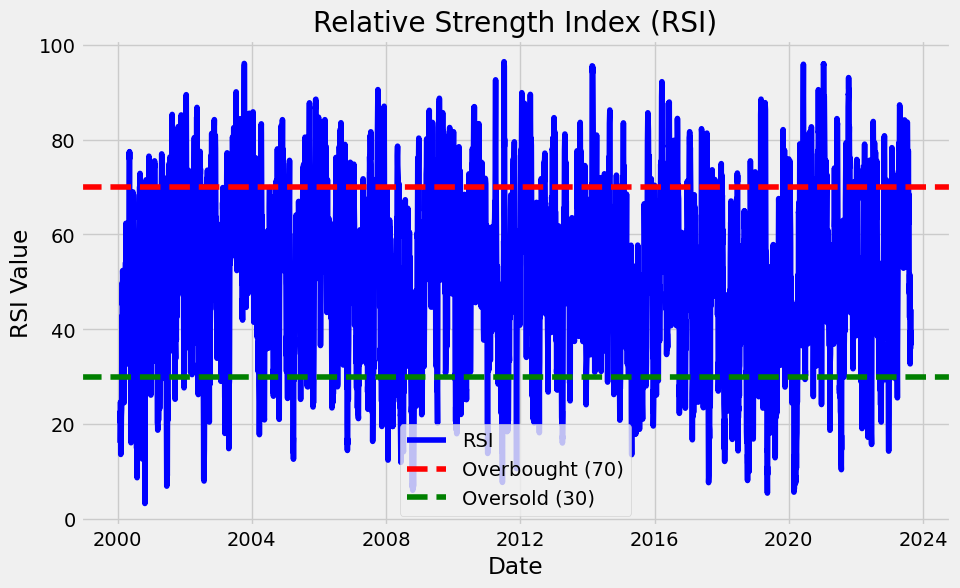

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['RSI'], color='blue', label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price,VAR_VWAP,RSI
Date,,,,,,,,,
2000-01-28,32.768833,34.876770,32.261009,33.573681,26.535963,13942903,33.570487,-1.009305,16.064853
2000-01-31,32.797577,36.160694,32.586784,34.436020,27.217533,14875954,34.394499,-1.714596,22.699605
2000-02-01,34.474342,35.432495,32.979626,33.592842,26.551104,6294485,34.001654,-2.034693,20.301740
2000-02-02,35.260029,35.815758,34.177319,34.512669,27.278114,4676810,34.835248,-2.529814,24.691301
2000-02-03,34.493507,34.828861,33.870708,33.985687,26.861599,2037576,34.228419,-3.349780,21.566753


# 3-EMA Strategy

In [17]:
df['EMA_12'] = df['Price'].ewm(span=12, adjust=False).mean()
df['EMA_24'] = df['Price'].ewm(span=24, adjust=False).mean()
df['EMA_55'] = df['Price'].ewm(span=55, adjust=False).mean()
df.drop(columns=['Adj Close'],inplace=True)

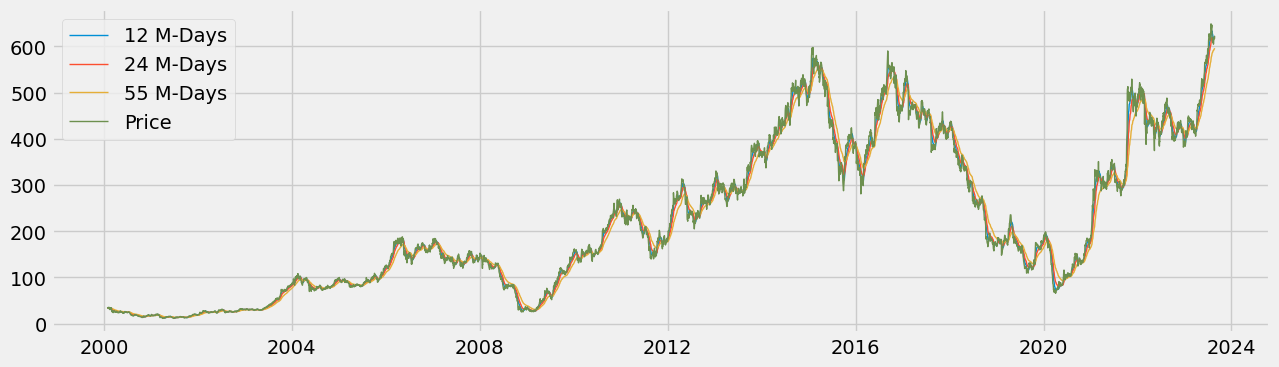

In [18]:
plt.figure(figsize=(14,4))
plt.plot(df['EMA_12'],label = "12 M-Days", linewidth=1)
plt.plot(df['EMA_24'],label = "24 M-Days", linewidth=1)
plt.plot(df['EMA_55'],label = "55 M-Days", linewidth=1)
plt.plot(df['Price'],label = "Price", linewidth=1)
plt.legend()
plt.show()

In [19]:
df.head()

,Open,High,Low,Close,Volume,Price,VAR_VWAP,RSI,EMA_12,EMA_24,EMA_55
Date,,,,,,,,,,,
2000-01-28,32.768833,34.876770,32.261009,33.573681,13942903,33.570487,-1.009305,16.064853,33.570487,33.570487,33.570487
2000-01-31,32.797577,36.160694,32.586784,34.436020,14875954,34.394499,-1.714596,22.699605,33.697258,33.636408,33.599916
2000-02-01,34.474342,35.432495,32.979626,33.592842,6294485,34.001654,-2.034693,20.301740,33.744088,33.665627,33.614264
2000-02-02,35.260029,35.815758,34.177319,34.512669,4676810,34.835248,-2.529814,24.691301,33.911959,33.759197,33.657870
2000-02-03,34.493507,34.828861,33.870708,33.985687,2037576,34.228419,-3.349780,21.566753,33.960645,33.796735,33.678247


# Alpha Using Daily high and Low

In [20]:
df['Daily_Var'] = df['High'] - df['Low']

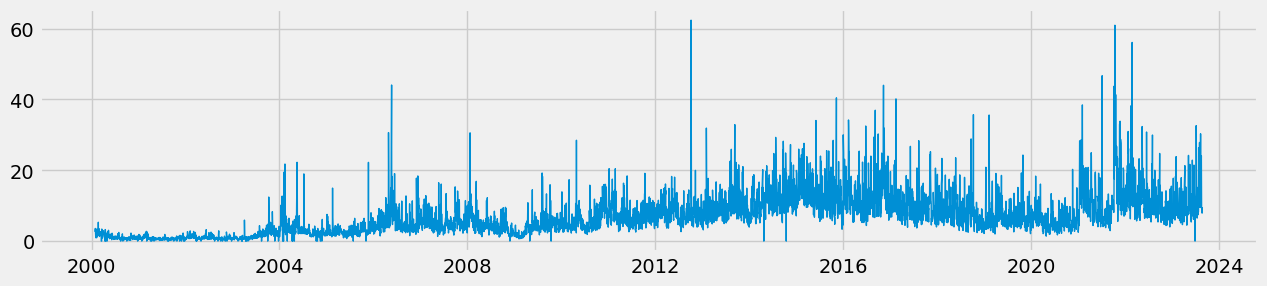

In [21]:
plt.figure(figsize=(14, 3))
plt.plot(df['Daily_Var'],linewidth=1)
plt.show()

In [22]:
df.head()

,Open,High,Low,Close,Volume,Price,VAR_VWAP,RSI,EMA_12,EMA_24,EMA_55,Daily_Var
Date,,,,,,,,,,,,
2000-01-28,32.768833,34.876770,32.261009,33.573681,13942903,33.570487,-1.009305,16.064853,33.570487,33.570487,33.570487,2.615761
2000-01-31,32.797577,36.160694,32.586784,34.436020,14875954,34.394499,-1.714596,22.699605,33.697258,33.636408,33.599916,3.573910
2000-02-01,34.474342,35.432495,32.979626,33.592842,6294485,34.001654,-2.034693,20.301740,33.744088,33.665627,33.614264,2.452869
2000-02-02,35.260029,35.815758,34.177319,34.512669,4676810,34.835248,-2.529814,24.691301,33.911959,33.759197,33.657870,1.638439
2000-02-03,34.493507,34.828861,33.870708,33.985687,2037576,34.228419,-3.349780,21.566753,33.960645,33.796735,33.678247,0.958153


In [23]:
df.describe()

,Open,High,Low,Close,Volume,Price,VAR_VWAP,RSI,EMA_12,EMA_24,EMA_55,Daily_Var
count,5888.000000,5888.000000,5888.000000,5888.000000,5.888000e+03,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000
mean,218.077540,221.336364,214.399222,217.742213,1.664797e+07,217.825933,0.387589,51.852949,217.280327,216.687112,215.247123,6.937142
std,162.550769,164.354507,160.433894,162.295279,2.171993e+07,162.347574,5.272995,17.481553,161.643506,160.863656,159.007045,5.694919
min,11.114574,11.631977,11.028340,11.267879,0.000000e+00,11.379663,-21.303664,3.264212,12.195454,12.777605,13.592897,0.000000
25%,82.784416,84.178530,81.098070,82.731722,5.973491e+06,82.861033,-2.111434,39.336348,82.197323,82.783531,84.829869,2.816971
50%,169.851936,172.448380,166.742577,169.424995,1.008266e+07,169.774999,0.292125,52.226272,168.092120,168.119552,166.288244,5.750000
75%,354.672440,359.160828,346.574997,354.062492,1.851423e+07,353.241669,2.777669,65.317589,353.344880,354.345547,359.951898,9.600006
max,647.000000,665.400024,642.000000,644.299988,3.905778e+08,648.500000,46.259153,96.450273,633.382356,619.095231,595.942034,62.380920


# MACD Signal

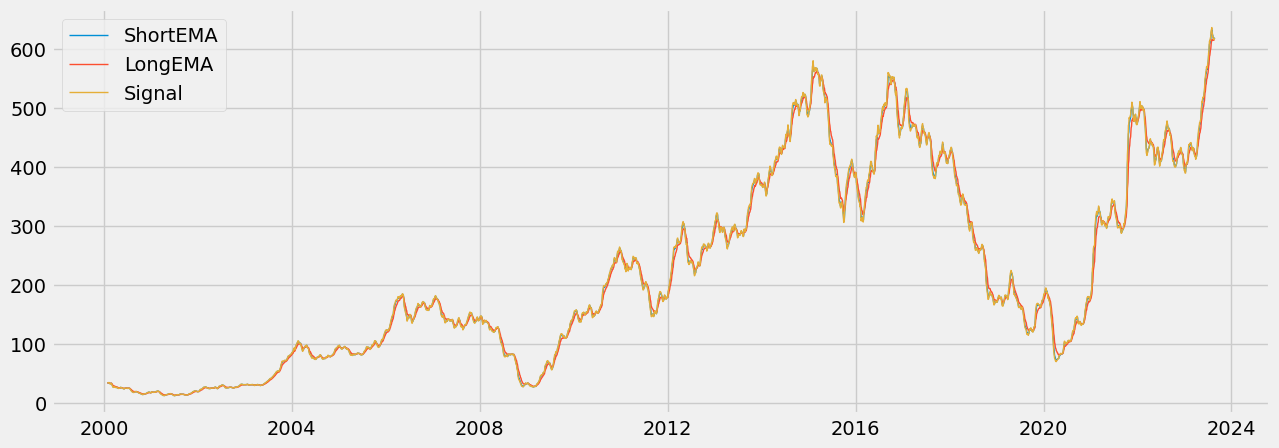

In [24]:
short_period = 12  # Adjust short and long periods as needed
long_period = 26
signal_period = 9  # Adjust the signal period as needed

df['ShortEMA'] = df['Close'].ewm(span=short_period, adjust=False).mean()
df['LongEMA'] = df['Close'].ewm(span=long_period, adjust=False).mean()
df['MACD'] = df['ShortEMA'] - df['LongEMA']
df['Signal'] = df['Close'].ewm(span=signal_period, adjust=False).mean()
df['Histogram_MACD'] = df['MACD']
plt.figure(figsize=(14,5))
plt.plot(df['ShortEMA'],label="ShortEMA",linewidth=1)
plt.plot(df['LongEMA'],label="LongEMA",linewidth=1)
plt.plot(df['Signal'],label="Signal",linewidth=1)
plt.legend()
plt.show()
df.drop(columns=['ShortEMA','LongEMA','MACD','Signal'],inplace=True)

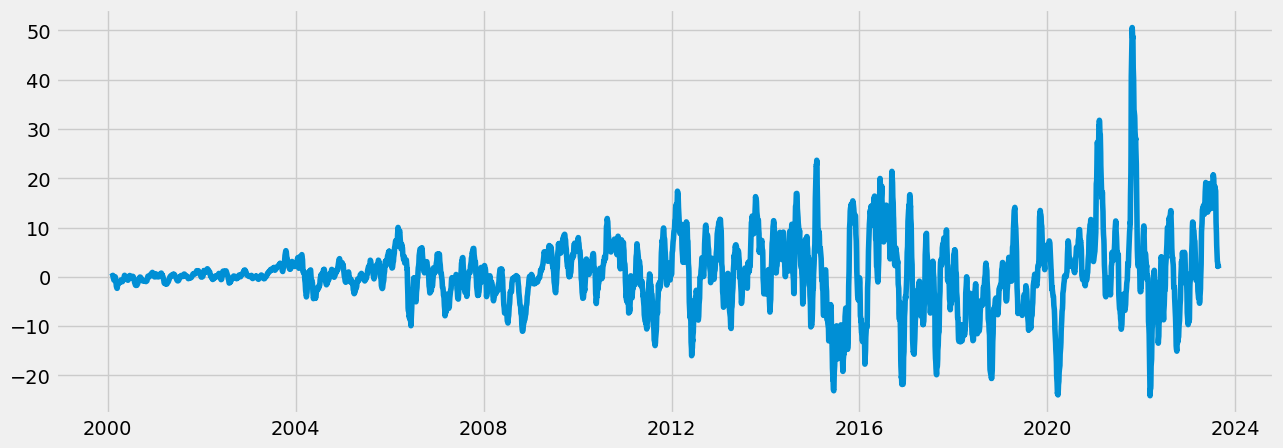

In [25]:
plt.figure(figsize=(14,5))
plt.plot(df['Histogram_MACD'])
plt.show()

In [26]:
df.describe()

,Open,High,Low,Close,Volume,Price,VAR_VWAP,RSI,EMA_12,EMA_24,EMA_55,Daily_Var,Histogram_MACD
count,5888.000000,5888.000000,5888.000000,5888.000000,5.888000e+03,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000
mean,218.077540,221.336364,214.399222,217.742213,1.664797e+07,217.825933,0.387589,51.852949,217.280327,216.687112,215.247123,6.937142,0.690385
std,162.550769,164.354507,160.433894,162.295279,2.171993e+07,162.347574,5.272995,17.481553,161.643506,160.863656,159.007045,5.694919,7.270235
min,11.114574,11.631977,11.028340,11.267879,0.000000e+00,11.379663,-21.303664,3.264212,12.195454,12.777605,13.592897,0.000000,-24.141799
25%,82.784416,84.178530,81.098070,82.731722,5.973491e+06,82.861033,-2.111434,39.336348,82.197323,82.783531,84.829869,2.816971,-2.341361
50%,169.851936,172.448380,166.742577,169.424995,1.008266e+07,169.774999,0.292125,52.226272,168.092120,168.119552,166.288244,5.750000,0.254745
75%,354.672440,359.160828,346.574997,354.062492,1.851423e+07,353.241669,2.777669,65.317589,353.344880,354.345547,359.951898,9.600006,3.807932
max,647.000000,665.400024,642.000000,644.299988,3.905778e+08,648.500000,46.259153,96.450273,633.382356,619.095231,595.942034,62.380920,50.586270


In [27]:
Y = df['Close']
df.drop(columns=['Close'],inplace=True)
X = df

In [28]:
train_len = int(X.shape[0]*0.80)
X_train = X.iloc[:train_len, :]
X_test = X.iloc[train_len:, :]
X.shape[0],X_train.shape[0],X_test.shape[0]

(5888, 4710, 1178)

In [29]:
X_train

,Open,High,Low,Volume,Price,VAR_VWAP,RSI,EMA_12,EMA_24,EMA_55,Daily_Var,Histogram_MACD
Date,,,,,,,,,,,,
2000-01-28,32.768833,34.876770,32.261009,13942903,33.570487,-1.009305,16.064853,33.570487,33.570487,33.570487,2.615761,0.000000
2000-01-31,32.797577,36.160694,32.586784,14875954,34.394499,-1.714596,22.699605,33.697258,33.636408,33.599916,3.573910,0.068791
2000-02-01,34.474342,35.432495,32.979626,6294485,34.001654,-2.034693,20.301740,33.744088,33.665627,33.614264,2.452869,0.054640
2000-02-02,35.260029,35.815758,34.177319,4676810,34.835248,-2.529814,24.691301,33.911959,33.759197,33.657870,1.638439,0.116308
2000-02-03,34.493507,34.828861,33.870708,2037576,34.228419,-3.349780,21.566753,33.960645,33.796735,33.678247,0.958153,0.121259
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-12,194.449997,194.449997,185.199997,20789180,188.566666,0.958500,66.813181,187.505255,192.433463,214.248497,9.250000,-6.353337
2018-11-13,180.750000,183.000000,178.350006,22189598,180.283335,1.676903,58.517815,186.394190,191.461452,213.035456,4.649994,-6.474000
2018-11-14,180.500000,183.000000,176.250000,15795883,178.683334,2.601861,55.626730,185.207905,190.439203,211.808594,6.750000,-6.710143


In [30]:
Y_train = Y.iloc[:train_len]
Y_test = Y.iloc[train_len:]

In [31]:
Y_train

Date
2000-01-28     33.573681
2000-01-31     34.436020
2000-02-01     33.592842
2000-02-02     34.512669
2000-02-03     33.985687
                 ...    
2018-11-12    186.050003
2018-11-13    179.500000
2018-11-14    176.800003
2018-11-15    180.199997
2018-11-16    179.899994
Name: Close, Length: 4710, dtype: float64

In [32]:
# Data normalization (scaling)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to 3D (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [36]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [39]:
model.fit(X_train_reshaped,Y_train,batch_size=1,epochs=4)

Epoch 1/4
4710/4710 [==============================] - 76s 15ms/step - loss: 5699.6104
Epoch 2/4
4710/4710 [==============================] - 67s 14ms/step - loss: 242.0278
Epoch 3/4
4710/4710 [==============================] - 75s 16ms/step - loss: 135.3317
Epoch 4/4
4710/4710 [==============================] - 75s 16ms/step - loss: 85.5615


In [40]:
prediction = model.predict(X_test_reshaped)
prediction = prediction.squeeze()

37/37 [==============================] - 2s 10ms/step


In [41]:
prediction.shape

(1178,)

In [42]:
rmse = np.sqrt(np.mean(prediction - Y_test)**2)
rmse

4.560217049409254

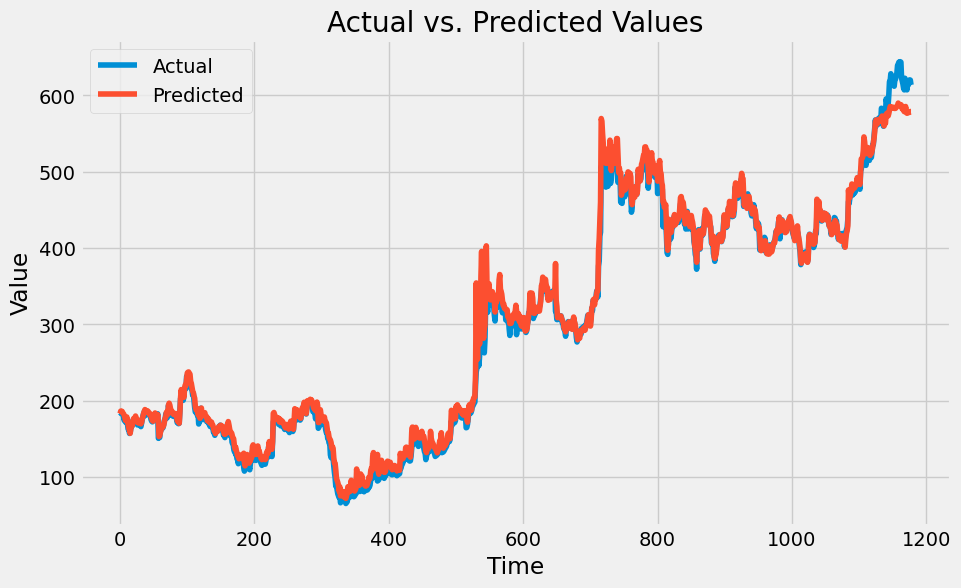

In [43]:
import matplotlib.pyplot as plt

# Plot actual values vs. predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual')
plt.plot(prediction, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
